<a href="https://colab.research.google.com/github/felipenjonas/lab_bdag/blob/main/tensorflow__clothes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classificador de roupas usando Tensorflow

Fonte: https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print("Tensorflow version: ",tf.__version__)

Tensorflow version:  2.6.0


### Importando o dataset "Fashion MNIST"

Possui 70 mil imagens em topns de cinza em 10 categorias. São artigos individuais de roupas em 28/28 px.
https://github.com/zalandoresearch/fashion-mnist

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Carregando a base de dados que retorna quatro NumPy arrays:

Os arrays train_images e train_labels são o conjunto de treinamento— os dados do modelo usados para aprender.
O modelo é testado com o conjunto de teste, os arrays test_images e test_labels.
As imagens são arrays NumPy de 28x28, com os valores de pixels entre 0 to 255. As labels (alvo da classificação) são um array de inteiros, no intervalo de 0 a 9. Esse corresponde com a classe de roupa que cada imagem representa:


| Label|Classe|
|------|------|
|0 | Camisetas/Top (T-shirt/top)|
|1	|Calça (Trouser)|
|2	|Suéter (Pullover)|
|3	|Vestidos (Dress)|
|4	|Casaco (Coat)|
|5	|Sandálias (Sandal)|
|6	|Camisas (Shirt)|
|7	|Tênis (Sneaker)|
|8	|Bolsa (Bag)|
|9	|Botas (Ankle boot)|

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Explorando os dados:
train_images.shape
#output: (quantidade de imagens, altura, largura) 

(60000, 28, 28)

In [7]:
# Quantidade de labels
len(train_labels)

60000

In [8]:
# Cada label é um inteiro entre 0 e 9:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Pré processamento

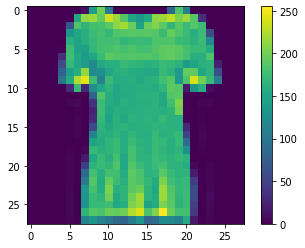

In [13]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()
# Os valores do pixels estão entre 0 e 255.

É necessário escalar os valores no intervalo de 0 e 1 antes de aliemntar o modelo de rede neural. Basta dividir por 255 tanto o conjunto treinamento quanto o conunto de teste.

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

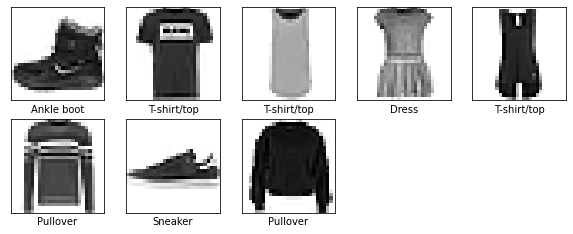

In [19]:
# Verificando se as imagens estão corretas
plt.figure(figsize=(10,10))
for i in range(8):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construindo o modelo

In [23]:
# Monstando as camadas
model = keras.Sequential([
    # transforma o array de 2 dimensões (28x28pixels) para 1 dimensao (28*28)
    keras.layers.Flatten(input_shape=(28, 28)),
    # Definindo 128 nós (nerônios)
    keras.layers.Dense(128, activation='relu'),
    # softmax de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contém um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.
    keras.layers.Dense(10, activation='softmax')
])

In [24]:
# Compilar o modelo:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treinando o modelo:
O modelo vai aprender a associar as imagens e as labels.

Usaremos o método model.fi()

In [25]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4962 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3742 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3356 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3131 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2818 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2692 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2568 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2466 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

## Avaliando Acurácia:
Comparamos como o modelo performou com o conjunto teste.

Vamos ter diferenças entre acurácia do conjunto teste e o conjunto treinamento.

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3346 - accuracy: 0.8851

Test accuracy: 0.8851000070571899


## Fazendo Predições:

In [31]:
predictions = model.predict(test_images)

# Array de 10 números. Representam a confiança do modelo
predictions[0]

array([8.8509211e-07, 3.0457286e-08, 3.4692007e-08, 7.3147541e-09,
       1.7299836e-08, 2.7926665e-04, 3.3015459e-07, 4.4464380e-03,
       3.1746964e-07, 9.9527270e-01], dtype=float32)

In [32]:
# Vemos que o modelo é confiante. E então mostraremos a label prevista.
np.argmax(predictions[0])

9

## Demonstrando gráficamente como se parece um conjunto total de previsão de 10 classes

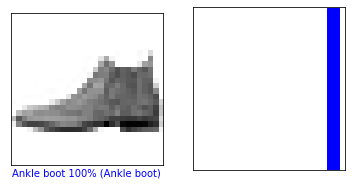

In [40]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Testando em cada posição do array:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Mostrando mais previsões, podendo ser apresentadas tantas a previsões corretas e incorretas

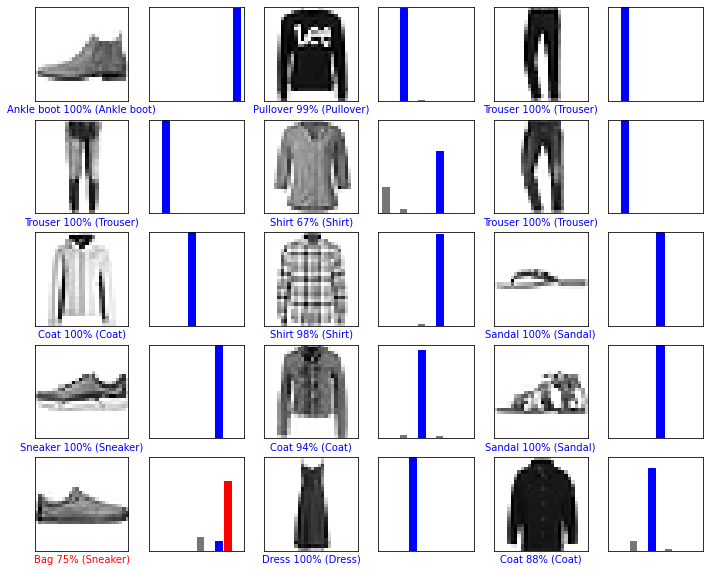

In [41]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

## Fazendo predição de uma única imagem:

OBS:
Modelos tf.keras são otimizados para fazer predições em um batch, ou coleções, de exemplos de uma vez. De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista:

In [42]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [43]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [44]:
# Predizer a label correta:
predictions_single = model.predict(img)

print(predictions_single)

[[8.8509552e-07 3.0457340e-08 3.4692139e-08 7.3147541e-09 1.7299870e-08
  2.7926691e-04 3.3015522e-07 4.4464422e-03 3.1747055e-07 9.9527270e-01]]


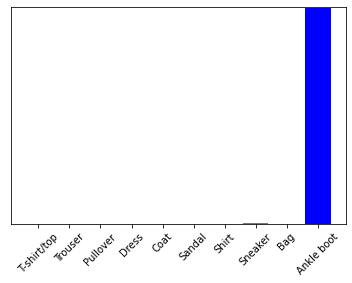

In [45]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [46]:
# Mostrando a predição da label de uma única imagem:
np.argmax(predictions_single[0])

9